In [554]:
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [556]:
# importing the dataframe Car theft

Car = pd.read_csv('car_with_neighborhood.csv')
Car.head()

,Unnamed: 0,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOY,OCC_DOW,OCC_HOUR,DIVISION,LOCATION_TYPE,PREMISES_TYPE,OFFENCE,HOOD_158,geometry,year_month,index_right,_id,neighbourhood_id,neighbourhood_name,CLASSIFICATION,CLASSIFICATION_CODE,neighborhood_area,park_area,park_density,park_count
0,15,GO-20141263029,2014-01-01,2014.0,January,1.0,1.0,Wednesday,15.0,D22,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,Theft From Motor Vehicle Under,161,MULTIPOINT (7217540.389160657 923750.4206014434),2014-01,44.0,45.0,161.0,Humber Bay Shores,Not an NIA or Emerging Neighbourhood,NaN,1.656623e+06,4.560332e+05,27.527885,15.0
1,17,GO-20141261694,2014-01-01,2014.0,January,1.0,1.0,Wednesday,1.0,D51,"Commercial Dwelling Unit (Hotel, Motel, B & B,...",Commercial,Theft From Motor Vehicle Under,166,MULTIPOINT (7225614.615938674 928062.741814502),2014-01,39.0,40.0,166.0,St Lawrence-East Bayfront-The Islands,Not an NIA or Emerging Neighbourhood,NaN,1.187522e+07,2.792382e+06,23.514354,53.0
2,19,GO-20149000046,2014-01-01,2014.0,January,1.0,1.0,Wednesday,0.0,D14,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Theft From Motor Vehicle Under,078,MULTIPOINT (7223387.096760584 928306.7149139447),2014-01,80.0,81.0,78.0,Kensington-Chinatown,Not an NIA or Emerging Neighbourhood,NaN,1.610389e+06,5.956709e+04,3.698925,10.0
3,20,GO-20149000033,2014-01-01,2014.0,January,1.0,1.0,Wednesday,3.0,D14,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,Theft From Motor Vehicle Under,081,MULTIPOINT (7221907.242392168 928266.3058665111),2014-01,105.0,106.0,81.0,Trinity-Bellwoods,Not an NIA or Emerging Neighbourhood,NaN,1.815086e+06,1.882582e+05,10.371863,8.0
4,22,GO-20141262977,2014-01-01,2014.0,January,1.0,1.0,Wednesday,14.0,D11,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,Theft From Motor Vehicle Under,085,MULTIPOINT (7218532.188669025 925500.5117301913),2014-01,102.0,103.0,85.0,South Parkdale,Neighbourhood Improvement Area,NIA,2.400398e+06,5.049779e+05,21.037253,29.0


In [557]:
# importing the dataframe Bike theft

Bike = pd.read_csv('bike_with_neighborhood.csv')
Bike.head()

,Unnamed: 0,EVENT_UNIQUE_ID,PRIMARY_OFFENCE,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DAY,OCC_DOY,OCC_HOUR,DIVISION,LOCATION_TYPE,PREMISES_TYPE,BIKE_MAKE,BIKE_MODEL,BIKE_TYPE,BIKE_SPEED,BIKE_COLOUR,BIKE_COST,STATUS,geometry,year_month,index_right,_id,neighbourhood_id,neighbourhood_name,CLASSIFICATION,CLASSIFICATION_CODE,neighborhood_area,park_area,park_density,park_count
0,18,GO-20141305317,THEFT UNDER,2014-01-05,2014.0,January,Sunday,5.0,5.0,23.0,D51,Bar / Restaurant,Commercial,VELOTEQ,SHOGT,EL,23.0,BLK,1800.0,STOLEN,MULTIPOINT (7224936.277272815 929729.1924906601),2014-01,37.0,38.0,168.0,Downtown Yonge East,Not an NIA or Emerging Neighbourhood,NaN,8.484274e+05,28301.814598,3.335797,10.0
1,22,GO-20141318032,THEFT UNDER,2014-01-10,2014.0,January,Friday,10.0,10.0,6.0,D52,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,SUPERCYCLE,NaN,OT,24.0,GRY,400.0,STOLEN,MULTIPOINT (7225260.850307529 927436.3714117319),2014-01,40.0,41.0,165.0,Harbourfront-CityPlace,Not an NIA or Emerging Neighbourhood,NaN,1.194692e+06,186947.260517,15.648151,25.0
2,23,GO-20141318595,THEFT UNDER,2014-01-10,2014.0,January,Friday,10.0,10.0,9.0,D14,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,EMMO,URBAN EN122687,SC,0.0,BLK,800.0,STOLEN,MULTIPOINT (7223819.787437547 928064.4457452307),2014-01,80.0,81.0,78.0,Kensington-Chinatown,Not an NIA or Emerging Neighbourhood,NaN,1.610389e+06,59567.093673,3.698925,10.0
3,30,GO-20149000445,THEFT UNDER,2014-01-14,2014.0,January,Tuesday,14.0,14.0,10.0,D52,Other Commercial / Corporate Places (For Profi...,Commercial,UK,NaN,RG,10.0,ONG,2000.0,STOLEN,MULTIPOINT (7224948.376702217 928385.8730984714),2014-01,4.0,5.0,170.0,Yonge-Bay Corridor,Not an NIA or Emerging Neighbourhood,NaN,1.173956e+06,19191.373312,1.634761,3.0
4,31,GO-20149000428,THEFT UNDER,2014-01-14,2014.0,January,Tuesday,14.0,14.0,8.0,D22,Schools During Supervised Activity,Educational,OT,NaN,RG,3.0,BLU,600.0,STOLEN,MULTIPOINT (7215101.391031749 920370.9264478507),2014-01,138.0,139.0,18.0,New Toronto,Not an NIA or Emerging Neighbourhood,NaN,3.657838e+06,685748.268890,18.747364,14.0


In [559]:
# concating the two dataframes to form one dataframe called CRIME
crime = pd.concat((Car, Bike)).reset_index(drop=True)

In [561]:
# filling the NaN values with zero(0) so the two dataframes can align.
crime = crime.fillna(0)
print(dataframe.info)

<bound method DataFrame.info of        Unnamed: 0 EVENT_UNIQUE_ID   OCC_DATE  OCC_YEAR  OCC_MONTH  OCC_DAY  \
0              15  GO-20141263029 2014-01-01      2014          1        1   
1              17  GO-20141261694 2014-01-01      2014          1        1   
2              19  GO-20149000046 2014-01-01      2014          1        1   
3              20  GO-20149000033 2014-01-01      2014          1        1   
4              22  GO-20141262977 2014-01-01      2014          1        1   
...           ...             ...        ...       ...        ...      ...   
74210       36119  GO-20249033961 2024-06-30      2024          6       30   
74211       36120  GO-20249033957 2024-06-29      2024          6       29   
74212       36121  GO-20249034009 2024-06-30      2024          6       30   
74213       36123  GO-20249034095 2024-06-30      2024          6       30   
74214       36124  GO-20241425656 2024-06-26      2024          6       26   

       OCC_HOUR DIVISION       

In [562]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74215 entries, 0 to 74214
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           74215 non-null  int64  
 1   EVENT_UNIQUE_ID      74215 non-null  object 
 2   OCC_DATE             74215 non-null  object 
 3   OCC_YEAR             74215 non-null  float64
 4   OCC_MONTH            74215 non-null  object 
 5   OCC_DAY              74215 non-null  float64
 6   OCC_DOY              74215 non-null  float64
 7   OCC_DOW              74215 non-null  object 
 8   OCC_HOUR             74215 non-null  float64
 9   DIVISION             74215 non-null  object 
 10  LOCATION_TYPE        74215 non-null  object 
 11  PREMISES_TYPE        74215 non-null  object 
 12  OFFENCE              74215 non-null  object 
 13  HOOD_158             74215 non-null  object 
 14  geometry             74215 non-null  object 
 15  year_month           74215 non-null 

In [563]:
# dropping unncessary columns from the dataframe

crime = crime.drop(['OCC_DOY', 'OCC_DOW', 'index_right', '_id', 'BIKE_MAKE', 'BIKE_MODEL', 'BIKE_TYPE', 'BIKE_SPEED', 'BIKE_COST', 'STATUS',], axis=1, inplace=False)

In [565]:
crime.head

<bound method NDFrame.head of        Unnamed: 0 EVENT_UNIQUE_ID    OCC_DATE  OCC_YEAR OCC_MONTH  OCC_DAY  \
0              15  GO-20141263029  2014-01-01    2014.0   January      1.0   
1              17  GO-20141261694  2014-01-01    2014.0   January      1.0   
2              19  GO-20149000046  2014-01-01    2014.0   January      1.0   
3              20  GO-20149000033  2014-01-01    2014.0   January      1.0   
4              22  GO-20141262977  2014-01-01    2014.0   January      1.0   
...           ...             ...         ...       ...       ...      ...   
74210       36119  GO-20249033961  2024-06-30    2024.0      June     30.0   
74211       36120  GO-20249033957  2024-06-29    2024.0      June     29.0   
74212       36121  GO-20249034009  2024-06-30    2024.0      June     30.0   
74213       36123  GO-20249034095  2024-06-30    2024.0      June     30.0   
74214       36124  GO-20241425656  2024-06-26    2024.0      June     26.0   

       OCC_HOUR DIVISION         

In [566]:
# time based segmentation of the date, day, month and year columns
# the sum function is used because they are all numeric columns

# Conversion of the'OCC_DATE' to datetime objects
crime['OCC_DATE'] = pd.to_datetime(crime['OCC_DATE'])

# Daily Segmentation
crime['OCC_DAY'] = crime['OCC_DATE'].dt.day  
daily_segmentation = crime.groupby('OCC_DAY').sum(numeric_only=True) 

# Monthly Segmentation
crime['OCC_MONTH'] = crime['OCC_DATE'].dt.month  
monthly_segmentation = crime.groupby('OCC_MONTH').sum(numeric_only=True)  

# Yearly Segmentation
crime['OCC_YEAR'] = crime['OCC_DATE'].dt.year  
yearly_segmentation = crime.groupby('OCC_YEAR').sum(numeric_only=True)

# Print results
print("Daily Segmentation:")
print(daily_segmentation)

print("Weekly Segmentation:")
print(Weekly_segmentation)

print("\nMonthly Segmentation:")
print(monthly_segmentation)

print("\nYearly Segmentation:")
print(yearly_segmentation)

Daily Segmentation:
         Unnamed: 0   OCC_YEAR  OCC_HOUR  neighbourhood_id  neighborhood_area  \
OCC_DAY                                                                         
1         116824253  5603743.0   32697.0          259662.0       1.553520e+10   
2          88978051  4525692.0   31132.0          215773.0       1.197022e+10   
3          90888322  4735439.0   32582.0          220553.0       1.184368e+10   
4          91414207  4820031.0   33607.0          226988.0       1.283323e+10   
5          94786121  4945267.0   34026.0          233998.0       1.241175e+10   
6          99260295  5078673.0   34605.0          244832.0       1.295072e+10   
7         100568981  5090932.0   34267.0          241029.0       1.230281e+10   
8          98791380  5068572.0   35238.0          237738.0       1.288448e+10   
9          95130710  4963306.0   34790.0          233129.0       1.193619e+10   
10        103826636  5322888.0   36834.0          254526.0       1.355619e+10   
11      

In [567]:
# checking the neighbourhoods with the highest number of green spaces for the analysis
crime.groupby(['neighbourhood_name'])['park_density'].mean().sort_values(ascending=False)

neighbourhood_name
Morningside Heights               48.456266
Eringate-Centennial-West Deane    33.822643
Morningside                       33.569685
High Park-Swansea                 33.457569
Mount Dennis                      31.447070
                                    ...    
North Toronto                      0.864763
Runnymede-Bloor West Village       0.690897
University                         0.414807
Danforth                           0.176194
0                                  0.000000
Name: park_density, Length: 159, dtype: float64

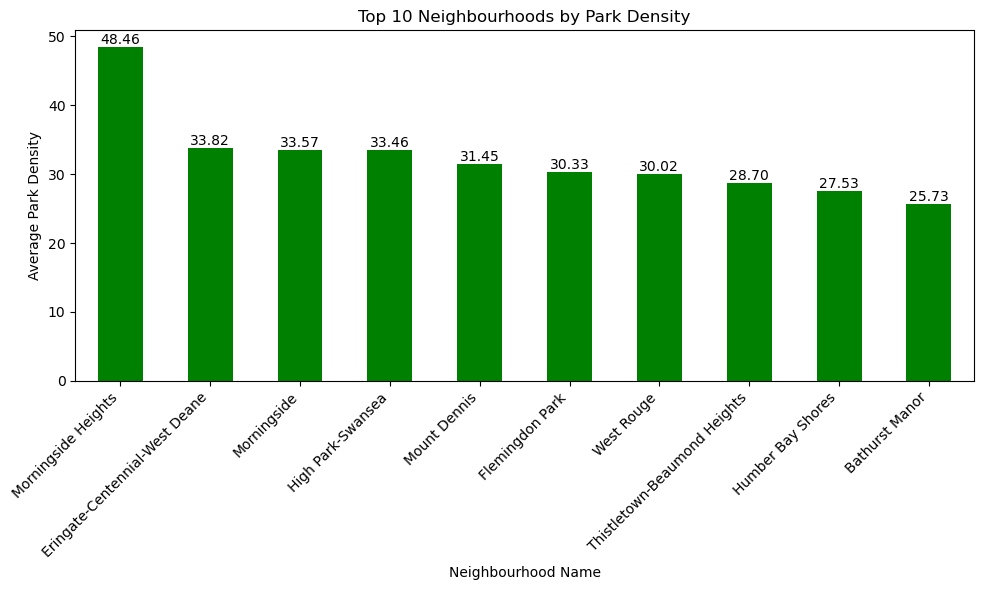

In [568]:
#plotting the neighbourhoods with the highest park density
park_density_by_neighbourhood = crime.groupby('neighbourhood_name')['park_density'].mean().sort_values(ascending=False)

# Select the top 10 neighbourhoods with the highest park density
top_10_neighbourhoods = park_density_by_neighbourhood.head(10)

# Plotting the bar chart for top 10 neighbourhoods
plt.figure(figsize=(10, 6))
top_10_neighbourhoods.plot(kind='bar', color='green')

# Adding data labels to the bars
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.2f}', 
             ha='center', va='bottom', fontsize=10, color='black')
    
plt.title('Top 10 Neighbourhoods by Park Density')
plt.xlabel('Neighbourhood Name')
plt.ylabel('Average Park Density')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.tight_layout()
plt.show()

In [569]:
# selecting the top 3 neighbourhoods with the highest number of green spaces 
selected_neighbourhoods = ['Morningside Heights', 'Eringate-Centennial-West Deane', 'Morningside']
selected_neighbourhoods = crime[crime['neighbourhood_name'].isin(selected_neighbourhoods)]
print(selected_neighbourhoods)

       Unnamed: 0 EVENT_UNIQUE_ID   OCC_DATE  OCC_YEAR  OCC_MONTH  OCC_DAY  \
98            182  GO-20141290813 2014-01-05      2014          1        5   
104           196  GO-20141298531 2014-01-06      2014          1        6   
186           319  GO-20141335885 2014-01-10      2014          1       10   
531           819  GO-20141453582 2014-02-02      2014          2        2   
606           928  GO-20141479738 2014-02-06      2014          2        6   
...           ...             ...        ...       ...        ...      ...   
69659       25968   GO-2021319498 2020-11-01      2020         11        1   
71926       31144  GO-20221723024 2022-09-04      2022          9        4   
72765       32727  GO-20231328601 2023-06-10      2023          6       10   
73560       34601  GO-20232483087 2023-10-25      2023         10       25   
73888       35369  GO-20249017467 2024-04-06      2024          4        6   

       OCC_HOUR DIVISION                                      L

In [570]:
# to find the number of offences by hour for each of the three neighbourhoods;
hourly_data = selected_neighbourhoods.groupby(['neighbourhood_name', 'OCC_HOUR']).size().unstack(fill_value=0)
print(hourly_data)

OCC_HOUR                        0.0   1.0   2.0   3.0   4.0   5.0   6.0   \
neighbourhood_name                                                         
Eringate-Centennial-West Deane    10     4     3     3     0     2     0   
Morningside                        8     8     2     7     2     0     2   
Morningside Heights               16    12     4     5     7     5     4   

OCC_HOUR                        7.0   8.0   9.0   10.0  11.0  12.0  13.0  \
neighbourhood_name                                                         
Eringate-Centennial-West Deane     1     4     7     1     6    10     8   
Morningside                        2     4     0     6     5    10     3   
Morningside Heights                9    10    10    11    11    15    11   

OCC_HOUR                        14.0  15.0  16.0  17.0  18.0  19.0  20.0  \
neighbourhood_name                                                         
Eringate-Centennial-West Deane     8    17    10    11    11     8    14   
Morningsid

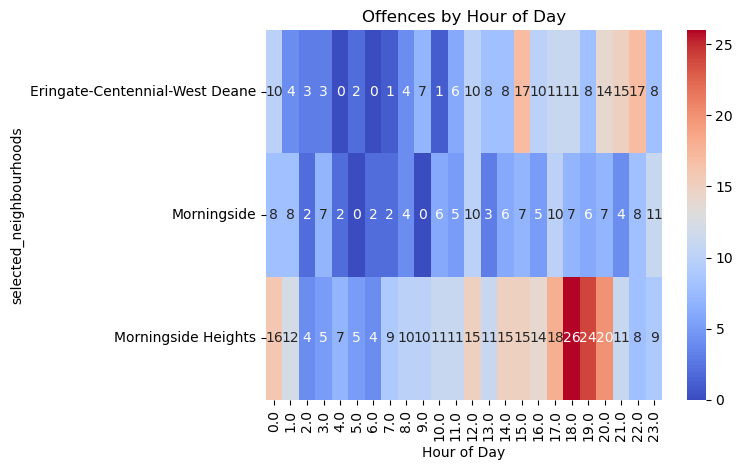

In [572]:
# plotting a heatmap of offences by hour for the three neighbourhoods
sns.heatmap(hourly_data, cmap='coolwarm', annot=True)
plt.title('Offences by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('selected_neighbourhoods')
plt.show()

In [573]:
# to find the number of offences by day for each of the three neighbourhoods;
daily_data = selected_neighbourhoods.groupby(['neighbourhood_name', 'OCC_DAY']).size().unstack(fill_value=0)
print(daily_data)

OCC_DAY                         1   2   3   4   5   6   7   8   9   10  11  \
neighbourhood_name                                                           
Eringate-Centennial-West Deane   5   6   3   4   5   9   7   6   6   6   6   
Morningside                      6   1   7   4   0   7   6   5   3   6   6   
Morningside Heights             13  10   8   9  15  10   7   8   6  12  11   

OCC_DAY                         12  13  14  15  16  17  18  19  20  21  22  \
neighbourhood_name                                                           
Eringate-Centennial-West Deane   8  10   6   5   4   5   5   2   7   8   7   
Morningside                      3   3   5   5   6   5   2   5   8   2   5   
Morningside Heights             10  10   5  11  12  11  14  22   9  12   6   

OCC_DAY                         23  24  25  26  27  28  29  30  31  
neighbourhood_name                                                  
Eringate-Centennial-West Deane   3   4   9   5   6   5   6   6   4  
Morningside

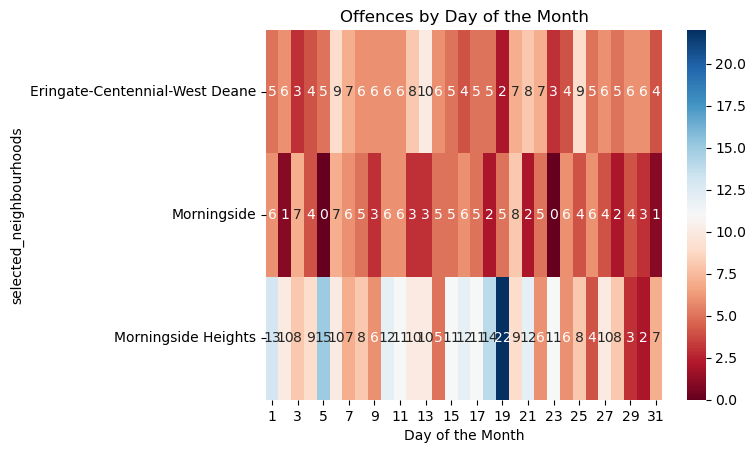

In [576]:
# plotting a heatmap of offences by day for the three neighbourhoods

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(daily_data, cmap='RdBu', annot=True)
plt.title('Offences by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('selected_neighbourhoods')
plt.show()

In [577]:
# to find the number of offences by hour for each of the three neighbourhoods;
monthly_data = selected_neighbourhoods.groupby(['neighbourhood_name', 'OCC_MONTH']).size().unstack(fill_value=0)
print(monthly_data)

OCC_MONTH                       1   2   3   4   5   6   7   8   9   10  11  12
neighbourhood_name                                                            
Eringate-Centennial-West Deane  13  14  16  11  13  16  16  15  12  16  15  21
Morningside                     10   6  12   5  13  14  12  14  13  10   9  12
Morningside Heights             13  25  29  28  25  22  29  36  17  13  27  26


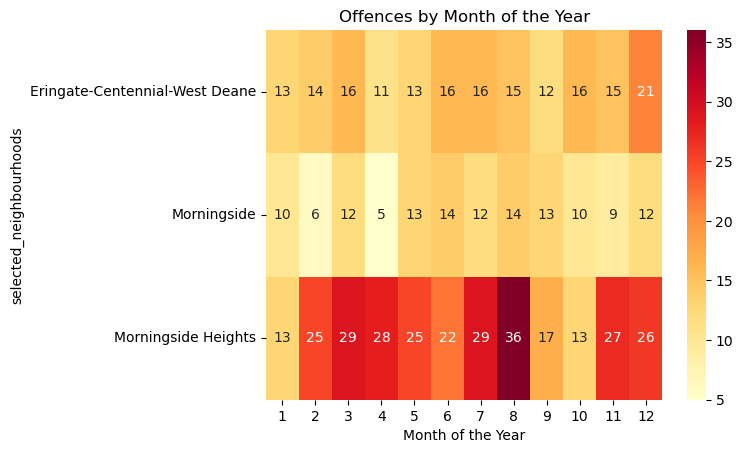

In [588]:
# plotting a heatmap of offences by months for the three neighbourhoods

sns.heatmap(monthly_data, cmap='YlOrRd', annot=True)
plt.title('Offences by Month of the Year')
plt.xlabel('Month of the Year')
plt.ylabel('selected_neighbourhoods')
plt.show()

In [589]:
# to find the number of offences by hour for each of the three neighbourhoods;
yearly_data = selected_neighbourhoods.groupby(['neighbourhood_name', 'OCC_YEAR']).size().unstack(fill_value=0)
print(yearly_data)

OCC_YEAR                        2014  2015  2016  2017  2018  2019  2020  \
neighbourhood_name                                                         
Eringate-Centennial-West Deane    16    13    12     9    19    16    19   
Morningside                       10    13     7    11    10     9     6   
Morningside Heights               30    27    14    29    34    29    32   

OCC_YEAR                        2021  2022  2023  2024  
neighbourhood_name                                      
Eringate-Centennial-West Deane    14    41    17     2  
Morningside                        7    29    17    11  
Morningside Heights               28    24    31    12  


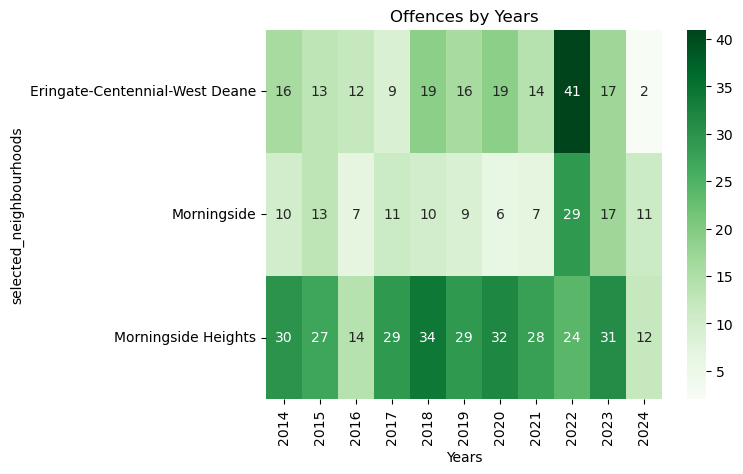

In [590]:
# plotting a heatmap of offences by years for the three neighbourhoods

sns.heatmap(yearly_data, cmap='Greens', annot=True)
plt.title('Offences by Years')
plt.xlabel('Years')
plt.ylabel('selected_neighbourhoods')
plt.xticks(rotation=90)
plt.show()